# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The value of learning rate in Stochastic Gradient Descent determines the size of the steps that the model can undertake while learning. It works like the speed limit that the model has to abide by.

If the learning rate is too high:
         The network learns quickly but potentially overshoots the target. It may oscillate around the right answer but never settles on it or can degrade (dive).

If the learning rate is set too low:
    The model learns very slowly. It takes a long time for results. It might get stuck at "good enough" instead of finding the optimum solution.

Where learning rate equals zero, no learning occurs because the update takes zero steps. However, when the learning rate grows to infinity, learning will result in oscillation between the optimal values or convergence to one

As a result, because of using small batches, there can be a bit of noisy learning . This can be tackled by not using a single number in most cases in training, but using techniques to adjust that number:

Decay (Schedules):
         This is the most used technique. It involves the beginning of the learning process with a higher learning rate to take large steps for quick progress. However, as the process continues, the learning rate is reduced by decay to take smaller and more accurate steps. This allows the model to converge to the optimal position.

Warm-up: Typically, beginning too aggressively can cause crashes. The term “warm-up” means warming up to a very low initial learning rate for a period to stabilize the model, then switching to the usual rapid rate.

Adaptive Methods (such as the Adam method or the RMSProp method): These are more complex learning algorithm techniques, which adjust your learning rate for you. Rather than learning at a single pace, you learn at different paces depending on each aspect of your architecture, determined by past mistakes.

Cyclical Learning Rates: Some algorithms change the learning rate in a cycle. This helps to "jump out" of a bad region to find a better solution.

As you can see, good training normally begins with a moderate speed of training, followed by slowing down (decaying), and closely observing the loss to ensure that you are either not going too quickly or too slowly.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

Training Batch GD...
Training SGD...

Metric          | Batch GD   | SGD       
----------------------------------------
MSE             | 65.1818     | 64.7552
R2 Score        | 0.5891     | 0.5918


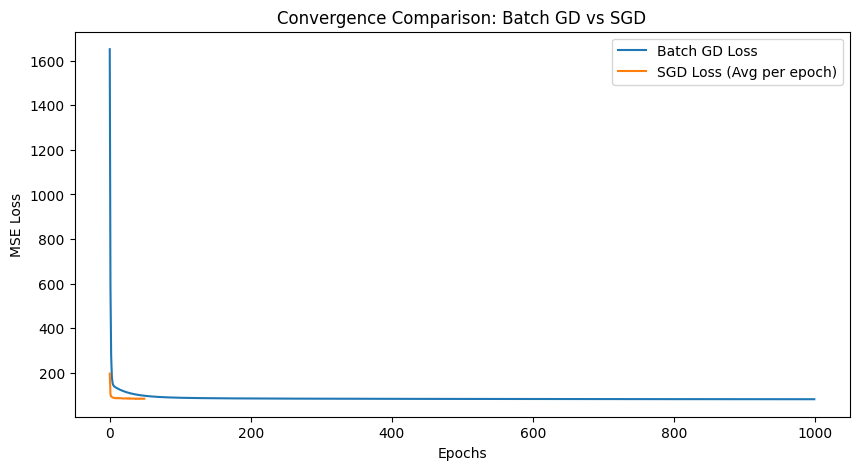

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Batch Gradient Descent (GD) Class ---
class BatchGDLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Calculate predictions for ALL samples at once
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients using ALL samples
            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Store loss for visualization
            loss = np.mean((y_pred - y)**2)
            self.loss_history.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# --- 2. Stochastic Gradient Descent (SGD) Class ---
class SGDLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Shuffle data at the start of each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            # Iterate through EACH sample individually
            for i in range(n_samples):
                xi = X_shuffled[i]
                yi = y_shuffled[i]

                # Prediction for single sample
                y_pred = np.dot(xi, self.weights) + self.bias

                # Gradient for single sample
                dw = 2 * xi * (y_pred - yi)
                db = 2 * (y_pred - yi)

                # Update parameters immediately
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

                epoch_loss += (y_pred - yi)**2

            self.loss_history.append(epoch_loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# --- 3. Data Preprocessing (Same as Question 2) ---
df = pd.read_csv('Real estate.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 4. Train Models ---

# Batch GD
print("Training Batch GD...")
bgd_model = BatchGDLinearRegression(learning_rate=0.1, epochs=1000)
bgd_model.fit(X_train, y_train)
bgd_preds = bgd_model.predict(X_test)

# SGD (Lower learning rate is usually required for SGD to be stable)
print("Training SGD...")
sgd_model = SGDLinearRegression(learning_rate=0.01, epochs=50)
sgd_model.fit(X_train, y_train)
sgd_preds = sgd_model.predict(X_test)

# --- 5. Evaluation & Comparison ---
bgd_mse = mean_squared_error(y_test, bgd_preds)
bgd_r2 = r2_score(y_test, bgd_preds)

sgd_mse = mean_squared_error(y_test, sgd_preds)
sgd_r2 = r2_score(y_test, sgd_preds)

print("\n" + "="*40)
print(f"{'Metric':<15} | {'Batch GD':<10} | {'SGD':<10}")
print("-" * 40)
print(f"{'MSE':<15} | {bgd_mse:.4f}     | {sgd_mse:.4f}")
print(f"{'R2 Score':<15} | {bgd_r2:.4f}     | {sgd_r2:.4f}")
print("="*40)

# Optional: Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(bgd_model.loss_history, label='Batch GD Loss')
# Plotting every 10th point for SGD because it has fewer epochs but more frequent updates
plt.plot(sgd_model.loss_history, label='SGD Loss (Avg per epoch)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Convergence Comparison: Batch GD vs SGD')
plt.legend()
plt.show()

What is causing the highly erratic behavior of the SGD algorithm is that ,it appears that
Batch GD computation of the gradient takes the average of the entire dataset. This results in a very accurate, smooth, and confident way to the minimum. This takes the shape of a straight line or a smooth curve in the valley.

The gradient is computed based on a single randomly chosen sample by the SGD. It might follow a trend for going left with one sample, then for going right with another sample, and then for going left again with yet another sample, and so on. Hence, the “noisy” or zigzag process is formed.

How and why is SGD favored for large datasets despite the presence of noise in the data is that ,in Memory Efficiency: Imagine you have 1 million samples, and if you're using Batch GD, you have to have all 1 million in memory to calculate one step of the gradient descent, whereas with SGD, you only need one.

Speed of Updates
    Batch GD takes a very long time to calculate one step. The weight update in SGD occurs as soon as it sees a sample. During this time when Batch GD has performed 1 step, SGD would have performed 1,000,000 steps. Escaping Local Minima: The “erratic” behavior is actually a feature, not a bug. The noise can potentially help to kick the model out of a shallow local minimum that Batch GD might get stuck in.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



a) Type of Decision Tree AlgorithmDecision Tree Algorithm is a type of Supervised Learning algorithm.1Why?The algorithm requires a labeled dataset (feature set X & target variable values y) for training. A model is created based on the rules derived from the attributesof the training dataset for forecasting the value/class of the target.

b) EntropyEntropy is referred to as the measure of impurity for data points considered for the constructionof the Decision Tree.

Entropy estimates the amount of uncertainty associated with the class corresponding to those data points.
Entropy = 0 – Pure node (all points belong to one class)

Entropy = 1 – Most impure node (all points are equally distributed across different classes, like 50/50 distribution)

Equation

$H(S) = -\sum p_i \log_2(p_i)$

c) Reduction in EntropyThe reduction in entropy measures the reduction in uncertainty for class labels caused due to division of the dataset based on certain feature attributes.

The greater the reduction, the greater the goodness-of-split, implying datapoints being categorized into "pure" classesThe Decision Tree algorithm chooses splits maximized via this reduction.

d)
1. Compute the Entropy of the Root Node

Total Samples (N) = 10
Positive (+) = 5, Negative (-) = 5
Probabilities: P(+) = 0.5, P(-) = 0.5

Calculation:
$$H(Root) = -0.5 \log_2(0.5) - 0.5 \log_2(0.5)$$
$$H(Root) = -0.5(-1) - 0.5(-1) = 0.5 + 0.5 = 1.00$$

Answer: The Entropy of the Root Node is 1.00.

2. Compute the Entropy of the Two Child Nodes for Each Allowed Split

Split A: (x <= -2?)
- Left Child (True): 1 sample (-). Pure node. Entropy = 0.00.
- Right Child (False): 9 samples (5+, 4-).
  $$H(Right) = -\frac{5}{9}\log_2(\frac{5}{9}) - \frac{4}{9}\log_2(\frac{4}{9})$$
  $$H(Right) \approx 0.98$$

Split B: (x <= 2?)
- Left Child (True): 9 samples (4+, 5-).
  $$H(Left) = -\frac{4}{9}\log_2(\frac{4}{9}) - \frac{5}{9}\log_2(\frac{5}{9})$$
  $$H(Left) \approx 0.98$$
- Right Child (False): 1 sample (+). Pure node. Entropy = 0.00.

Split C: (y <= 2?)
- Left Child (True): 5 samples (4+, 1-).
  $$H(Left) = -0.8\log_2(0.8) - 0.2\log_2(0.2)$$
  $$H(Left) \approx 0.72$$
- Right Child (False): 5 samples (1+, 4-).
  $$H(Right) \approx 0.72$$ (Symmetric to Left)

3. Compute the Reduction in Entropy for Each Split

Reduction (Gain) = Root Entropy - Weighted Average of Child Entropies

Split A (x <= -2?):
Weighted Entropy = (1/10 * 0.00) + (9/10 * 0.98) = 0.88
Reduction = 1.00 - 0.88 = 0.12

Split B (x <= 2?):
Weighted Entropy = (9/10 * 0.98) + (1/10 * 0.00) = 0.88
Reduction = 1.00 - 0.88 = 0.12

Split C (y <= 2?):
Weighted Entropy = (5/10 * 0.72) + (5/10 * 0.72) = 0.72
Reduction = 1.00 - 0.72 = 0.28

4. Identify Which Split Should Be Chosen

Comparison:
- Split A Gain: 0.12
- Split B Gain: 0.12
- Split C Gain: 0.28

Answer: The split (y <= 2?) should be chosen because it results in the maximum entropy reduction (0.28).

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


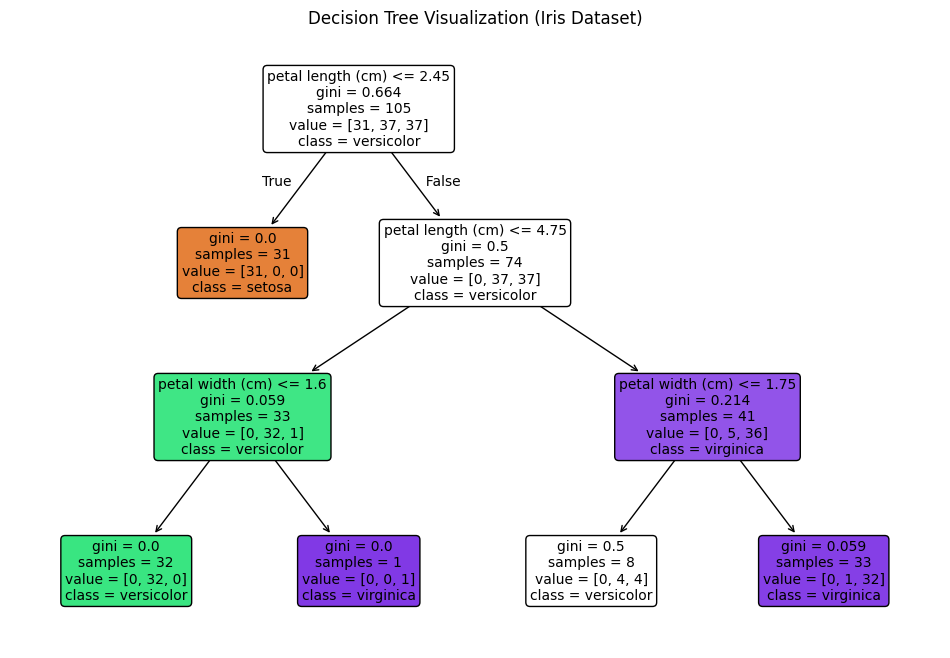

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load Data
iris = load_iris()
X = iris.data
y = iris.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) What type of learning algorithm is Support Vector Machine (SVM)? Is it supervised or unsupervised learning?

Answer: Support Vector Machine (SVM) is a Supervised Learning algorithm. Explanation: Just like Decision Trees and Linear Regression algorithm, in order to train an SVM algorithm, we require labeled data (input variables along with their target output variables). That is why an SVM algorithm uses supervised learning.



b) What is margin in SVM?
      Why do people maximize margin SVMs?

Definition: Margin is the perpendicular distance from the hyperplane to the closest data points of either class.

Why Maximize:
The SVM maximizes this margin because the larger the margin, the better the generalization. A larger "gap" between the classes will make the generalization robust to new points that could potentially lie closer to the boundary than the training points.
Note that, in this equation, n is the dimensionality of the feature space.

c) What support vectors, and why are they important?

Definition: Support vectors are the data points from the dataset which lie closest to the decision boundary or hyperplane.

Importance: These support vectors are termed the “pillars” of the SVM. The location and orientation of the optimal hyperplane can be expressed in terms of these points alone. If you take away all the other points, but the support vectors, your decision boundary would look the same.

d) Explain the role of the kernel function in a kernel.

Purpose:

The kernel function makes it possible for the SVM to solve non-linear classification tasks.

The kernel function basically projects the data, which is not linearly separable, into a higher-dimensional space, making it separable in this space, yet this computation is avoided because of the “Kernel Trick.”


Common Kernels:

Radial Basis Function Kernel or Gaussian Kernel.

Polynomial Kernel. (Linear, Sigmoid are choices).

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a) In linearly separable data, how does SVM decide on the optimal hyperplane?

Out of the infinite lines (or hyperplanes) that can be formed to separate both classes, SVM finds the one for which the margin is maximum. This is referred to as the "Maximum Margin Hyperplane".

b) What if SVM encounters linearly non-separable data?

If a linear line can't separate both classes:

Soft Margin: SVM " settles for a good approximation" in terms of a linear boundary and allows some margin violations based on a penalty controlled by parameter $C$

Kernel Trick: In 4.1(d), it transforms the inputs to a different dimension to form a linear boundary for linearly separable classes in higher dimension.

c) What is the significance of regularization parameter C in SVM?

"$C$" defines how regularization trade-off between smooth decision boundary & small training error margin.

Very Large C (Very Strict):Model gets heavily punished for misclassifications.

Constraint: to correctly classify every training point.

Decision: Margin gets narrowed down & decision boundary gets complex.

Risk: Higher chance of "Overfitting".

Very Small C (Very lenient):Model gives less priority to misclassifications of some training points.

Decision: Gives utmost priority to larger margin even though some training samples fall on other side.

Constraint: Margin gets widened.

Risk: Chance of Underfitting if too simple, yet generally robust for generalization.